In [10]:
import cv2
import numpy as np
from utils import show_images

src = cv2.imread('./image/cow.jpg')

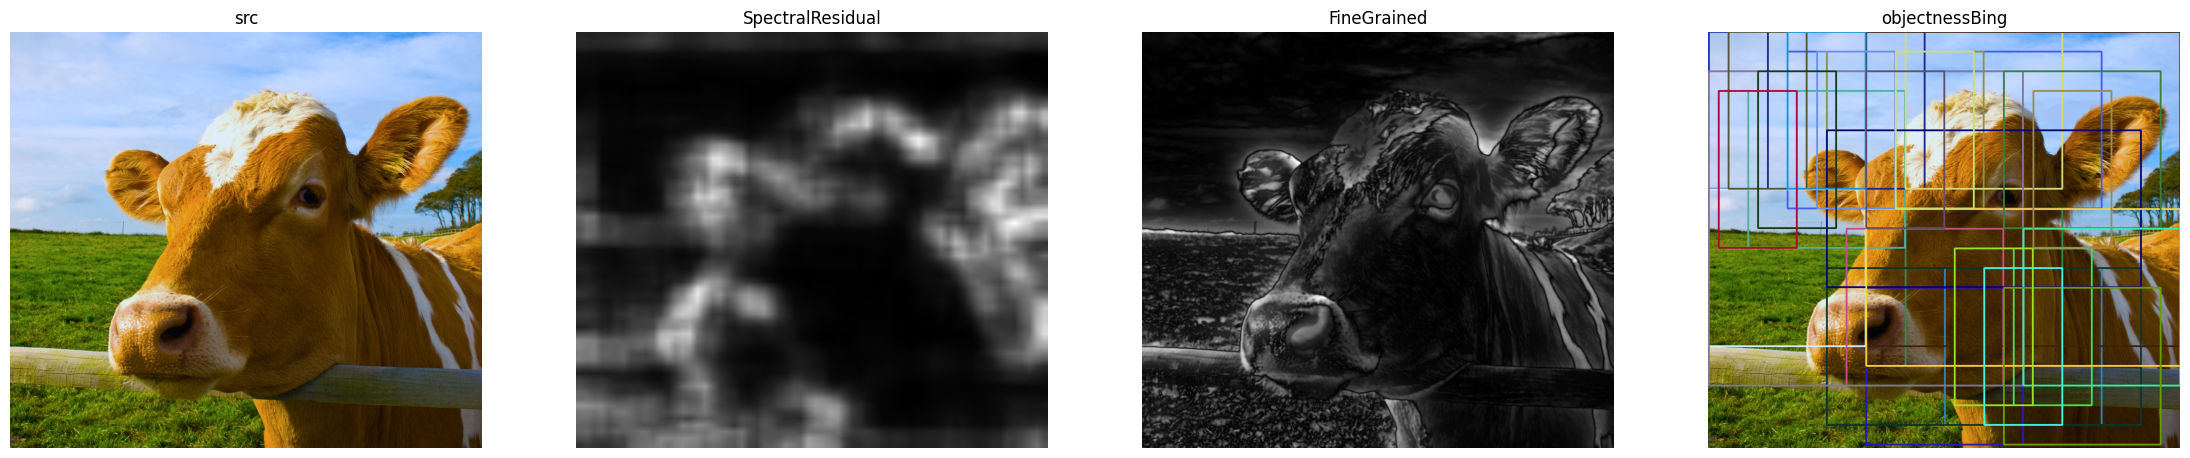

In [23]:
results = [('src', src)]

model = cv2.saliency.StaticSaliencySpectralResidual.create()
success, saliencyMap = model.computeSaliency(src)
results.append(('SpectralResidual', saliencyMap))

model = cv2.saliency.StaticSaliencyFineGrained.create()
success, saliencyMap = model.computeSaliency(src)
results.append(('FineGrained', saliencyMap))

model = cv2.saliency.ObjectnessBING.create()
model.setTrainingPath('./image/saliency/ObjectnessTrainedModel')
success, saliencyRects = model.computeSaliency(src)
# 这个方法返回的是 (n, 1, 4)，即各个框，这里显示 30 个
saliencyMap = np.copy(src)
for i in range(0, min(saliencyRects.shape[0], 30)):
	(startX, startY, endX, endY) = saliencyRects[i].flatten()
	color = [int(c) for c in np.random.randint(0, 255, size=(3,))]
	cv2.rectangle(saliencyMap, (startX, startY), (endX, endY), color, 2)
results.append(('objectnessBing', saliencyMap))

show_images(results)